In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C



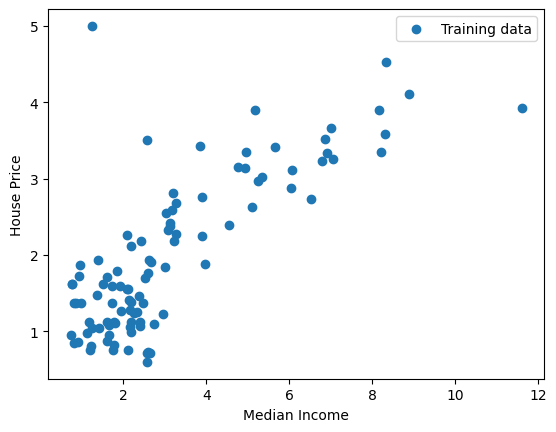

In [7]:

# Load the dataset
data = fetch_california_housing(as_frame=True)
X = data.data[["MedInc"]].values  # Use only 'MedInc' (Median Income) as the feature
y = data.target.values  # House prices (in $100,000)


# Select a subset of the data (GP is too slow for large datasets)
X = X[:200]
y = y[:200]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the feature (important for Gaussian Process)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# plot the training data
plt.figure()
plt.scatter(X_train, y_train, label="Training data")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.legend()
plt.show()



In [3]:
# Define the kernel (ConstantKernel * RBF)
kernel = C(1.0, (1e-2, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
gp.fit(X_train_scaled, y_train)

GaussianProcessRegressor(alpha=0.1, kernel=1**2 * RBF(length_scale=1))

In [4]:
# Print final kernel for analysis
print("Optimized Kernel:", gp.kernel_) ## the GaussianProcessRegressor do hyperparameter optimization !!!!! 

Optimized Kernel: 2.48**2 * RBF(length_scale=1.17)


In [5]:
y_pred, y_std = gp.predict(X_test_scaled, return_std=True)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print(f"RMSE on test set: {rmse:.2f}")

y_pred_train, y_std_train = gp.predict(X_train_scaled, return_std=True)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(f"RMSE on training set: {rmse_train:.2f}")


RMSE on test set: 0.55
RMSE on training set: 0.59


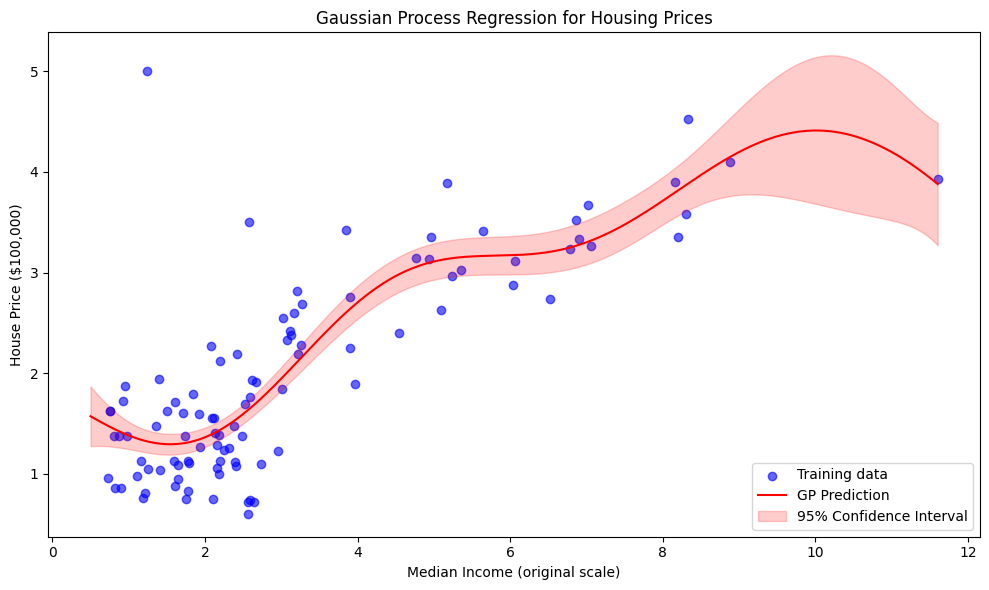

In [6]:

# Generate predictions
X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)  # Prediction points (original scale)
X_pred_scaled = scaler.transform(X_pred)  # Scale the prediction points
y_pred, y_std = gp.predict(X_pred_scaled, return_std=True)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data", alpha=0.6)
#plt.scatter(X_test, y_test, color="green", label="Testing data", alpha=0.6)
plt.plot(X_pred, y_pred, color="red", label="GP Prediction")
plt.fill_between(
    X_pred.ravel(),
    y_pred - 1.96 * y_std,
    y_pred + 1.96 * y_std,
    alpha=0.2,
    color="red",
    label="95% Confidence Interval",
)
plt.xlabel("Median Income (original scale)")
plt.ylabel("House Price ($100,000)")
plt.title("Gaussian Process Regression for Housing Prices")
plt.legend()
plt.tight_layout()
plt.show()

